# 第9章：モンテかルロ・シミュレーション（2/2）

## はじめに

In [ ]:
# CELL PROVIDED

# %pip install -q japanize-matplotlib-jlite py4macro

In [144]:
# CELL PROVIDED

import japanize_matplotlib_jlite
import numpy as np
import matplotlib.pyplot as plt
import py4macro
import random

plt.rcParams['figure.figsize'] = (5, 3.3)

## 中心極限定理

### 中心極限定理とは

母集団の分布は不明として、以下を仮定。

\begin{equation}
  \text{母平均： }\mu,
  \qquad
  \text{母標準偏差： }\sigma\quad\text{(「シグマ」と読む)}
\end{equation}

標本の平均を$\overline{X}_n$とし，**標準化標本平均**を次のように定義する。

\begin{equation}
  Z_n = \frac{\overline{X}_n-\mu}{\sigma/\sqrt{n}}
\end{equation}

**中心極限定理（Central Limit Theorem)**

無作為に抽出された標本$X_i$（$i=1,2,\dots,n$）の平均を$\overline{X}_n$とすると，母集団の分布が連続型でも離散型でも，母平均$\mu$と母標準偏差$\sigma$が有限である限り，標準化標本平均$Z_n$の分布は，標本の大きさ$n$が大きくなるにつれて，標準正規分布に近づきます。

### コイントス（再考）

\begin{equation*}
  \text{母平均: }\mu=0.5
  \qquad\quad
  % \text{分散： }&\sigma^2=p(1-p)=0.5^2\\
  \text{母標準偏差: }\sigma=\sqrt{p(1-p)}=0.5
\end{equation*}

コード9.3.1

In [145]:
n, head = 30, 12
( head/n - 0.5 ) / ( 0.5/n**0.5 )

-1.0954451150103321

コード9.3.2

In [146]:
# CELL PROVIDED

def z_value(n):
    """
    [引数] n：同時にトスするコインの数
    [戻り値] Z値"""

    toss = [random.randint(0,1) for _ in range(n)]
    head = sum(toss)
    st_avr = (head/n - 0.5) / ( 0.5/n**0.5 )

    return st_avr

コード9.3.3

In [147]:
random.seed(1)

n, N = 2, 5
toss = [z_value(n) for _ in range(N)]
toss

[-1.4142135623730951,
 0.0,
 1.4142135623730951,
 1.4142135623730951,
 -1.4142135623730951]

### ヒストグラム

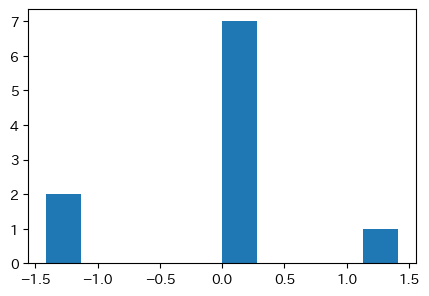

In [148]:
# CELL PROVIDED
n, N = 2, 10
toss = [z_value(n) for _ in range(N)]
plt.hist(toss)
plt.show()

#### 準備

コード9.3.4

In [149]:
unique = len( set(toss) )
unique

3

コード9.3.5

In [150]:
set(toss)

{-1.4142135623730951, 0.0, 1.4142135623730951}

#### ヒストグラムのプロット

コード9.3.6

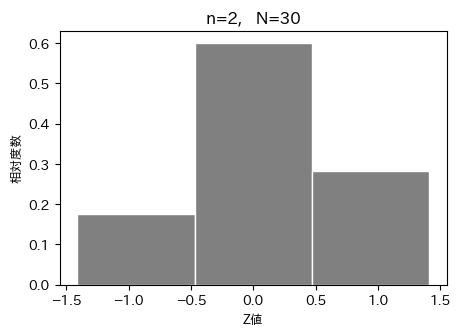

In [151]:
random.seed(123)
n, N = 2, 30
toss = [z_value(n) for _ in range(N)]
unique = len( set(toss) )
plt.hist(toss,
         bins=unique,
         color="grey",
         edgecolor="white",
         density=True)
plt.title(f"n={n},   N={N}", size=12)
plt.xlabel("Z値", size=9)
plt.ylabel("相対度数", size=9)
plt.show()

コード9.3.7

In [152]:
def plot_hist(n, N=10_000, seed=None):
    """
    [引数] n: 一度に投げるコインの数
            N: 試行回数"""
    random.seed(seed)
    toss = [z_value(n) for _ in range(N)]
    unique = len( set(toss) )    # 階級の数
    plt.hist(toss, bins=unique, color="grey",
                    edgecolor="white", density=True)
    plt.title(f"n={n},   N={N}", size=12)
    plt.xlabel("Z値", size=9)
    plt.ylabel("相対度数", size=9)
    plt.show()

#### シミュレーション

コード9.3.8

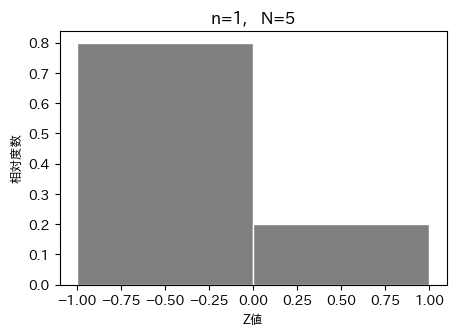

In [153]:
plot_hist(1, 5, seed=2)

コード9.3.9

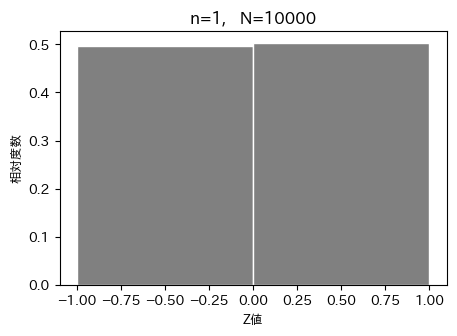

In [154]:
plot_hist(1, seed=2)

コード9.3.10

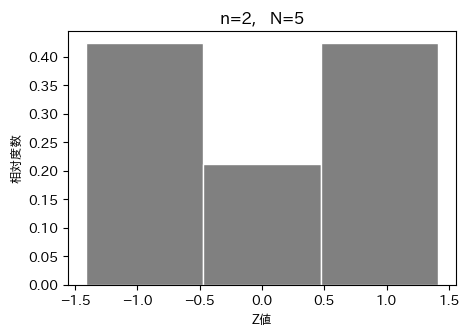

In [155]:
plot_hist(2, 5, seed=1)

コード9.3.11

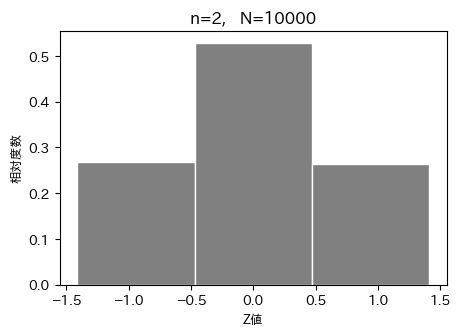

In [156]:
plot_hist(2, seed=1)

コード9.3.12

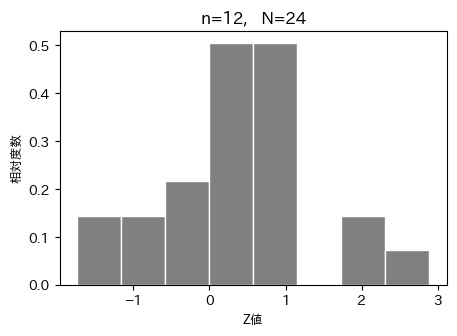

In [157]:
plot_hist(12, 24, seed=12)

コード9.3.13

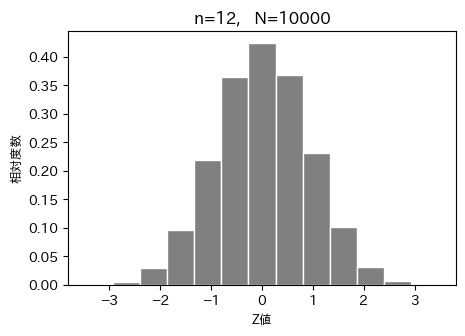

In [158]:
plot_hist(12, seed=12)

コード9.3.14

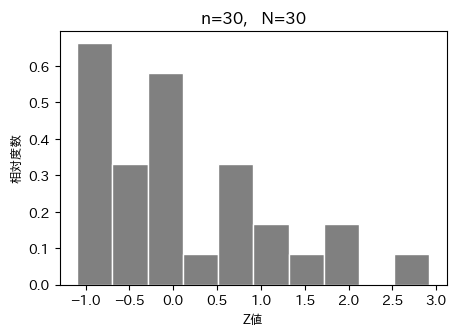

In [159]:
plot_hist(30, 30, seed=1)

コード9.3.15

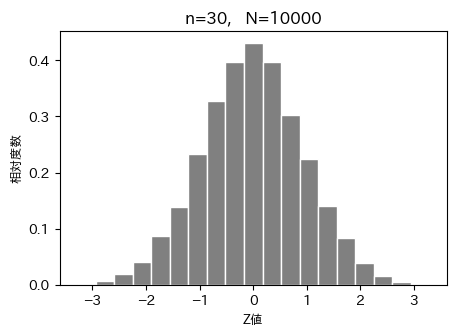

In [160]:
plot_hist(30, seed=1)

コード9.3.16

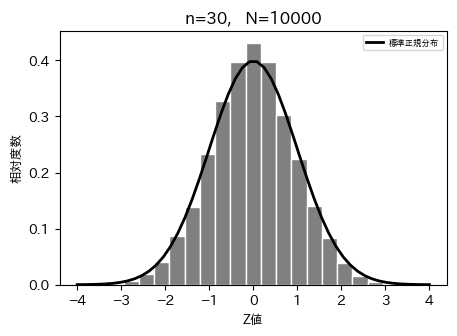

In [161]:
# CELL PROVIDED

# 標準正規分布のコード
def normal_dist(z):
    return ( np.exp(-z**2/2) /
             (2*np.pi)**(0.5) )

x = py4macro.xvalues(-4, 4, 50)
y = [normal_dist(i) for i in x]

# 重ねてプロット
plt.plot(x, y,
         color="black",
         linewidth=2,
         label="標準正規分布")
plt.legend(fontsize=6)
plot_hist(30, seed=1)
plt.show()

コード9.3.17

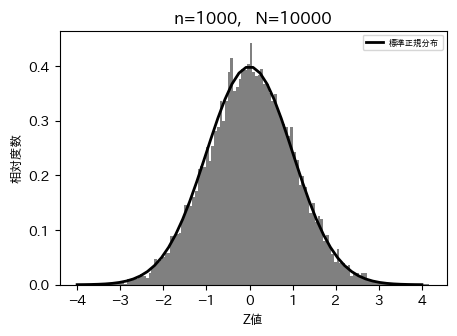

In [162]:
# CELL PROVIDED

# コイントスのシミュレーション
random.seed(1)
n, N = 1000, 10_000
toss = [z_value(n)
        for _ in range(N)]

# プロット
plt.hist(toss,
         bins=sorted(set(toss)),   # ここが異なる
         color="grey",
         density=True)
plt.title(f"n={n},   N={N}",
          size=12)
plt.xlabel("Z値", size=9)
plt.ylabel("相対度数", size=9)
plt.plot(x, y,
          color="black",
          linewidth=2,
          label="標準正規分布")
plt.legend(fontsize=6)
plt.show()